In [1]:
from scipy.stats import norm
import numpy as np 
import matplotlib.pyplot as ply
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, spearmanr, pearsonr
from decimal import Decimal


In [2]:
df_0=pd.read_csv('/Users/tagirgamirov/Downloads/Dataset_AB_TEST.csv', sep=';',decimal=',')


In [3]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [4]:
df_0.isnull().sum()

id_client       0
id_group       74
sum_pay       127
id_point       81
months_reg      0
dtype: int64

In [5]:
df=df_0.dropna()

In [6]:
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [7]:
df.describe()



,id_client,sum_pay,id_point,months_reg
count,1.084000e+04,10840.000000,10840.000000,10840.000000
mean,1.372953e+06,3568.758026,1180.039760,4.693911
std,1.482036e+04,2927.273978,4.353995,3.174513
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361710e+06,1250.750000,1178.000000,2.000000
50%,1.370636e+06,3173.500000,1179.000000,4.000000
75%,1.373417e+06,5356.500000,1179.000000,6.000000
max,1.420345e+06,24797.000000,1199.000000,14.000000


In [8]:
def statustical_analysis(r,q = [0.1, 0.25,0.3, 0.4, 0.5, 0.6, 0.75, 0.9]):
    
    if (type(r) is not list) & (type(r) is not tuple):
        print ('нужен список или кортеж!')
        return
    
    if len(r)<=4:
        print("Требуется более длинный ряд")
        return
    
    r = pd.Series(r)
        
    r1_var=r.var()
    r1_mean=r.mean()
    r1_std=r.std()
    
    print ("среднее ряда =", r1_var )
    print ("дисперсия ряда =", r1_mean)
    print ("стандартное отклонение ряда =",r1_std)
    print()
    
    qs = np.quantile(r,q)
    
    for i in range(len(q)):
        if q[i]==0.5:
            print ("медиана =", qs[i])
        elif q[i]==0.25:
            print ("квартиль =", qs[i])
        elif q[i]==0.75:
            print ("квартиль =", qs[i])
        elif q[i]*100% 10==0:
            print ("номер дедиля",q[i]*10, "=", qs[i])
        else:
            print("квантиль", q[i],"=", qs[i])
            
        sns.histplot(data=r)
        return qs,r1_var,r1_mean, r1_std


In [9]:
def test_calc (r1,r2, alpha=0.05):
    s,p=ttest_ind(r1,r2)
    if p < alpha : 
        print("Гипотеза H0 не подтверждается: средние не равны ")
        print("Разница средних = ", r1.mean()-r2.mean())
    else:
        print("разница средних = 0")
        print("Гипотеза H0  подтверждается: средние равны ")
    
    return (s,p) 



In [10]:
df.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [11]:
df.describe()

,id_client,sum_pay,id_point,months_reg
count,1.084000e+04,10840.000000,10840.000000,10840.000000
mean,1.372953e+06,3568.758026,1180.039760,4.693911
std,1.482036e+04,2927.273978,4.353995,3.174513
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361710e+06,1250.750000,1178.000000,2.000000
50%,1.370636e+06,3173.500000,1179.000000,4.000000
75%,1.373417e+06,5356.500000,1179.000000,6.000000
max,1.420345e+06,24797.000000,1199.000000,14.000000


In [12]:
df.groupby('id_group').count()

,id_client,sum_pay,id_point,months_reg
id_group,,,,
control,5171,5171,5171,5171
test,5669,5669,5669,5669


In [13]:
df = df[(~df['id_group'].isnull()) & (~df['sum_pay'].isnull()) & (~df['id_point'].isnull())]

In [14]:
df_cr=df[df['sum_pay']<11000]
df_cr.describe()

,id_client,sum_pay,id_point,months_reg
count,1.076100e+04,10761.000000,10761.000000,10761.000000
mean,1.372876e+06,3431.377939,1180.033268,4.684509
std,1.482483e+04,2454.362626,4.366931,3.168530
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361691e+06,1237.000000,1178.000000,2.000000
50%,1.370605e+06,3155.000000,1179.000000,4.000000
75%,1.373387e+06,5274.000000,1179.000000,6.000000
max,1.420345e+06,10141.000000,1199.000000,14.000000


In [15]:
df_abt=df_cr['sum_pay'].tolist()
q_abt=np.arange(0.95,1,0.01)

среднее ряда = 8568932.941996625
дисперсия ряда = 3568.7580258302582
стандартное отклонение ряда = 2927.27397795229

номер дедиля 1.0 = 410.0


(array([  410.   ,  1250.75 ,  1590.   ,  2329.6  ,  3173.5  ,  3934.   ,
         5356.5  ,  7088.2  ,  7805.1  ,  8041.   ,  8453.64 ,  9043.66 ,
         9809.76 , 21046.075]),
 8568932.941996625,
 3568.7580258302582,
 2927.27397795229)

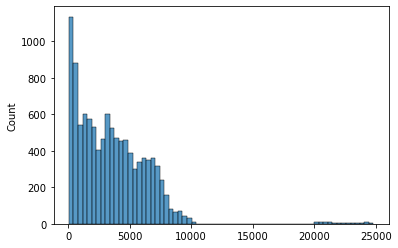

In [16]:
statustical_analysis(tuple(df['sum_pay']), q=[.1,.25,.3,.4,.5,.6,.75,.9,.95,.96,.97,.98,.99,.995])

In [17]:
df=df[df['sum_pay']<20000]

In [18]:
df_A=df[df['id_group']=='control']
df_B=df[df['id_group']=='test']

In [19]:
def show_hist(r1,r2,graph_title, xlabel= 'размер платежа', ylabel='кол-во людей'):
    sns.set(rc = {'figure.figsize':(12,9)})
    ax1 = sns.histplot(r1, color = 'red')
    ax2 = sns.histplot(r2, color = 'green')
    ax1.set(xlabel = xlabel, ylabel = ylabel)
    ply.title(graph_title)
    ply.show()
    return r1.mean(), r2.mean()


In [20]:
r1=df_cr.loc[df_cr['id_group']=='test']['sum_pay']
r2=df_cr.loc[df_cr['id_group']=='control']['sum_pay']

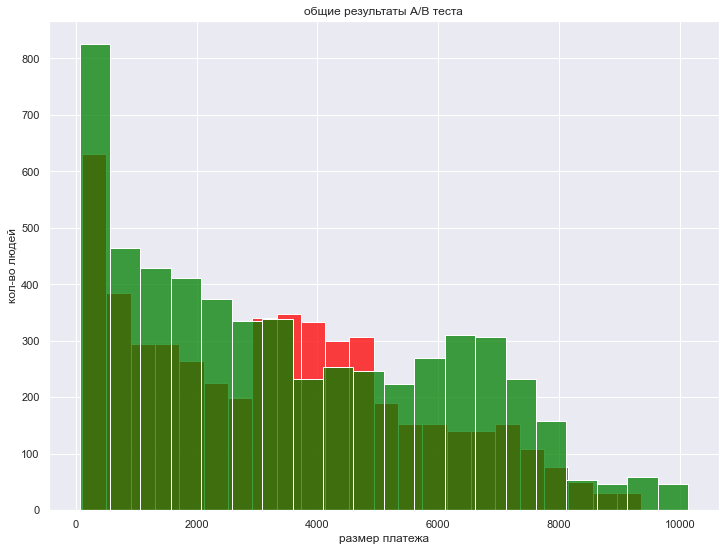

(3339.535408560311, 3515.361323607899)

In [21]:
show_hist(df_A['sum_pay'], df_B['sum_pay'], 'общие результаты А/В теста')


In [22]:
def mann_whitney_func(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p < alpha:
        print ("гипотеза Н0 не подтверждается: средние равны")
        print("разница средних  =", r1.mean() - r2.mean())
    else:
        print("гипотза Н0 подтверждается: средние равны ")
        print("разница средних  = 0")
        return s, p

In [23]:
mann_whitney_func(df_A['sum_pay'], df_B['sum_pay'])


гипотеза Н0 не подтверждается: средние равны
разница средних  = -175.82591504758784


In [24]:
test_calc(df_A['sum_pay'], df_B['sum_pay'])

Гипотеза H0 не подтверждается: средние не равны 
Разница средних =  -175.82591504758784


(-3.7141912292177888, 0.0002048855494553075)

In [25]:
df.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [26]:
df.loc[1199]

id_client     1419980
id_group         test
sum_pay        3987.0
id_point       1199.0
months_reg          3
Name: 1199, dtype: object

In [27]:
df.groupby(['id_point', 'id_group']).nunique()

id_client  sum_pay  months_reg
id_point id_group                                
1178.0   control        2403     1946          15
         test           2406     1909          15
1179.0   control        1697     1500          15
         test           1745     1526          15
1182.0   control        1012      957          15
         test            950      907          15
1186.0   control          23       23          12
         test             40       40          13
1188.0   control           5        5           4
         test              4        4           4
1199.0   test            476      456          15

In [28]:
df=df[~df['id_point'].isin([1186.0, 1188.0, 1199.0])]


In [29]:
df.groupby(['id_point','id_group']).nunique()

id_client  sum_pay  months_reg
id_point id_group                                
1178.0   control        2403     1946          15
         test           2406     1909          15
1179.0   control        1697     1500          15
         test           1745     1526          15
1182.0   control        1012      957          15
         test            950      907          15

анализ точки 1182.0


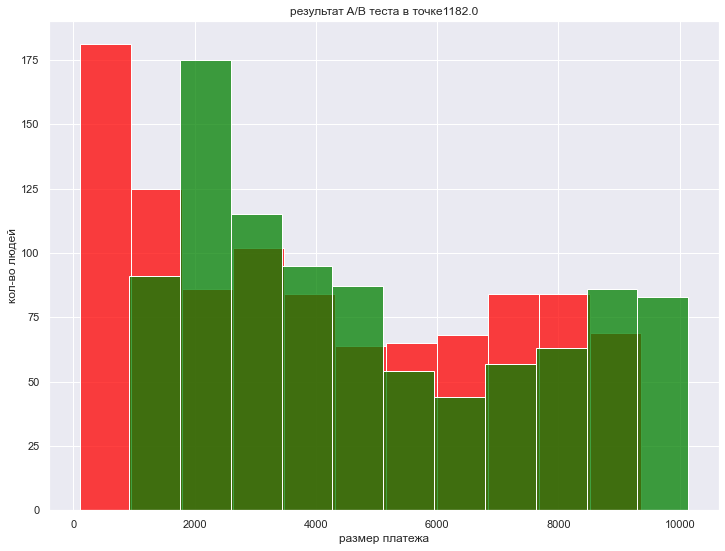

Гипотеза H0 не подтверждается: средние не равны 
Разница средних =  -908.1867859371746

гипотеза Н0 не подтверждается: средние равны
разница средних  = -908.1867859371746


анализ точки 1178.0


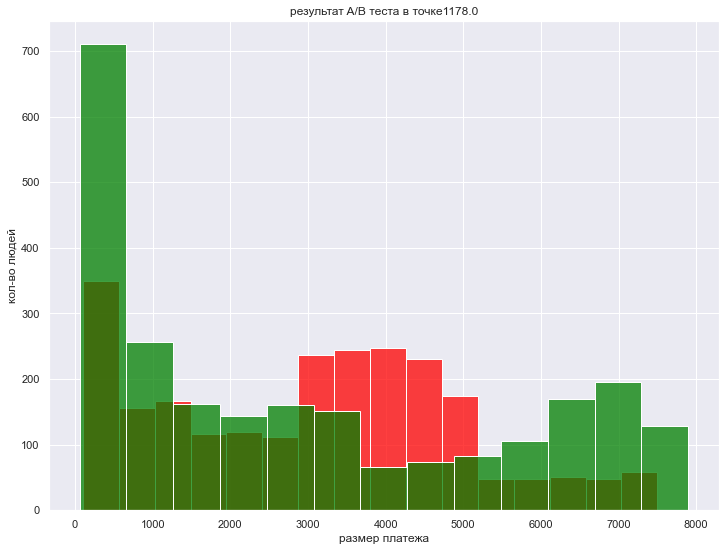

разница средних = 0
Гипотеза H0  подтверждается: средние равны 

гипотза Н0 подтверждается: средние равны 
разница средних  = 0


анализ точки 1179.0


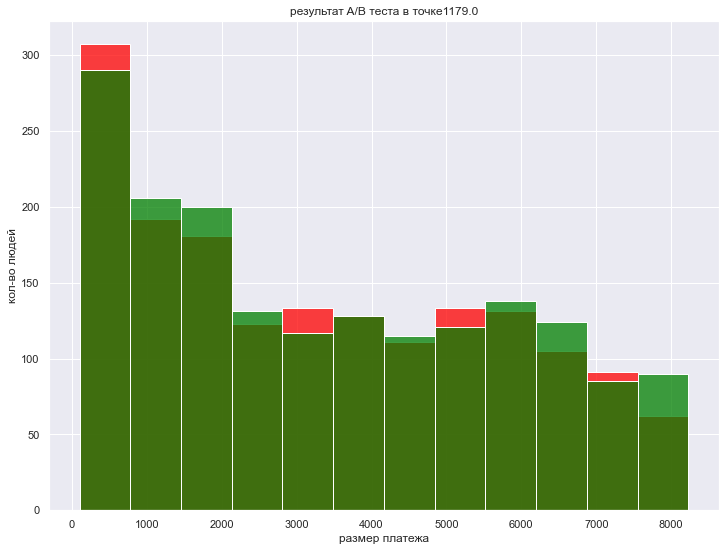

разница средних = 0
Гипотеза H0  подтверждается: средние равны 

гипотза Н0 подтверждается: средние равны 
разница средних  = 0




In [30]:
for i in df.id_point.unique():
    print('анализ точки', i)
    df_loc_A = df_A[df_A['id_point']==i]
    df_loc_B = df_B[df_B['id_point']==i]
    
    title_loc = 'результат A/B теста в точке' + str(i)
    show_hist(df_loc_A['sum_pay'], df_loc_B['sum_pay'], title_loc)
    
    test_calc(df_loc_A['sum_pay'], df_loc_B['sum_pay'])
    print()
    mann_whitney_func(df_loc_A['sum_pay'], df_loc_B['sum_pay'])
    print()
    print()

In [31]:
df_cr.groupby(['id_point','id_group']).agg({'id_client':'count','sum_pay':'mean' })

id_client      sum_pay
id_point id_group                        
1178.0   control        2403  3036.214732
         test           2406  2936.386949
1179.0   control        1697  3331.310548
         test           1745  3421.826934
1182.0   control        1012  4036.942688
         test            950  4945.129474
1186.0   control          23  4546.000000
         test             40  3638.400000
1188.0   control           5  5202.000000
         test              4  4946.000000
1199.0   test            476  3908.861345

In [32]:
df['months_reg'].unique()

array([11,  2,  3, 14,  5,  1,  0,  9,  8, 12,  4,  6, 10, 13,  7])

<AxesSubplot:xlabel='months_reg', ylabel='sum_pay'>

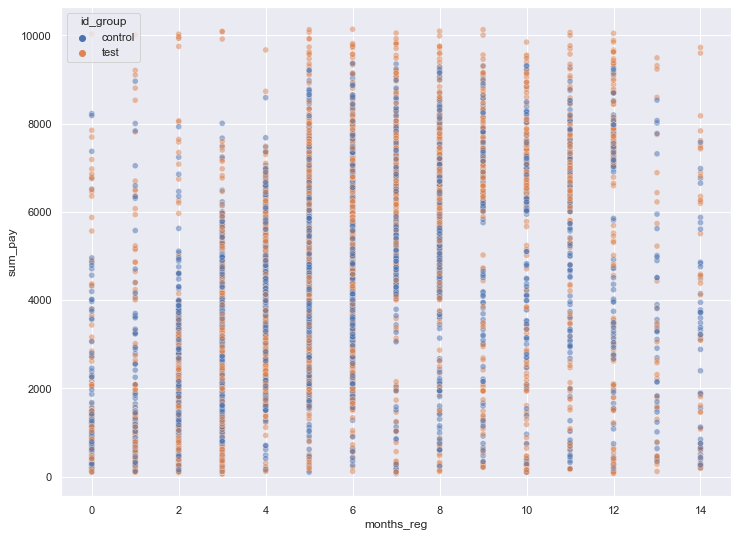

In [33]:
sns.scatterplot(data=df,x= df['months_reg'], y=df['sum_pay'], alpha=0.5, hue=df['id_group'])

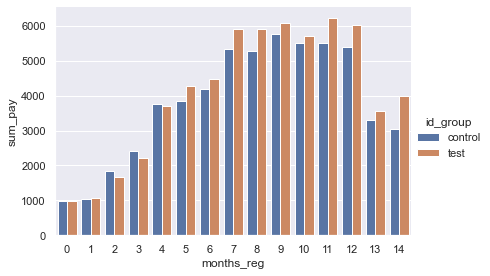

In [34]:
df_cor=df.groupby(['months_reg','id_group'])['sum_pay'].mean().reset_index()


sns.catplot(x = 'months_reg', 
            y = 'sum_pay', 
                    hue = 'id_group',
                    data =  df_cor, 
                    kind = "bar", 
                    height = 4,
                    aspect = 1.5)

<AxesSubplot:xlabel='months_reg'>

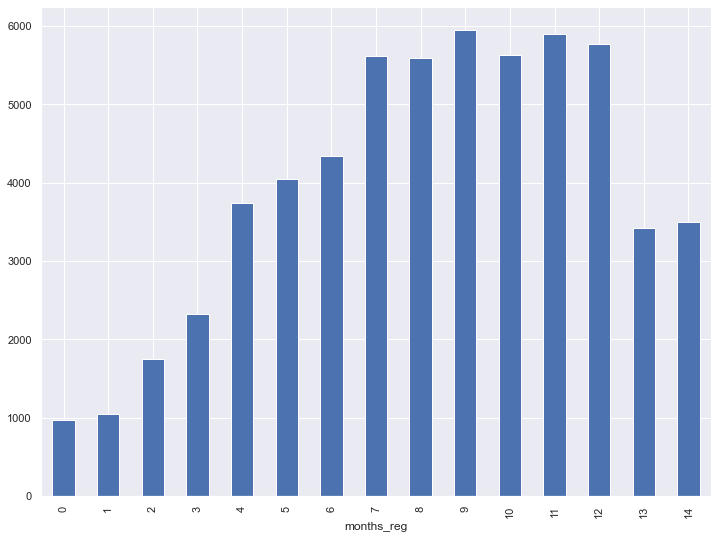

In [35]:
df.groupby('months_reg')['sum_pay'].mean().plot(kind='bar')

In [36]:
sp, p = spearmanr(df['months_reg'], df['sum_pay'])
sp, p

(0.6571833744696238, 0.0)

In [37]:
pear, p = pearsonr(df['months_reg'], df['sum_pay'])
pear, p



(0.6040187245662575, 0.0)